In [ ]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

file_path = "/content/cmems_mod_glo_wav_anfc_0.083deg_PT3H-i_1743248877201.nc"  # Replace with your file path
ds = xr.open_dataset(file_path)
print(ds)
df = ds.to_dataframe().reset_index()
print(df.head())
print(list(ds.variables))
df.to_csv("output.csv")

<xarray.Dataset> Size: 670MB
Dimensions:    (time: 1, latitude: 2041, longitude: 4320)
Coordinates:
  * time       (time) datetime64[ns] 8B 2025-04-08
  * latitude   (latitude) float32 8kB -80.0 -79.92 -79.83 ... 89.83 89.92 90.0
  * longitude  (longitude) float32 17kB -180.0 -179.9 -179.8 ... 179.8 179.9
Data variables: (12/19)
    VCMX       (time, latitude, longitude) float32 35MB ...
    VHM0       (time, latitude, longitude) float32 35MB ...
    VHM0_SW1   (time, latitude, longitude) float32 35MB ...
    VHM0_SW2   (time, latitude, longitude) float32 35MB ...
    VHM0_WW    (time, latitude, longitude) float32 35MB ...
    VMDR       (time, latitude, longitude) float32 35MB ...
    ...         ...
    VTM01_SW1  (time, latitude, longitude) float32 35MB ...
    VTM01_SW2  (time, latitude, longitude) float32 35MB ...
    VTM01_WW   (time, latitude, longitude) float32 35MB ...
    VTM02      (time, latitude, longitude) float32 35MB ...
    VTM10      (time, latitude, longitude) float3

In [ ]:
pip install cartopy

In [ ]:
null_counts = df.isnull().sum()
print(null_counts)

time               0
latitude           0
longitude          0
VCMX         3688074
VHM0         3688074
VHM0_SW1     3688074
VHM0_SW2     3688074
VHM0_WW      3688074
VMDR         3627401
VMDR_SW1     3627401
VMDR_SW2     3627401
VMDR_WW      3627401
VMXL         3688074
VPED         3627401
VSDX         3688074
VSDY         3688074
VTM01_SW1    3688074
VTM01_SW2    3688074
VTM01_WW     3688074
VTM02        3688074
VTM10        3688074
VTPK         3688074
dtype: int64


In [ ]:
non_null_counts = df.notnull().sum()
print(non_null_counts)

time         8817120
latitude     8817120
longitude    8817120
VCMX         5129046
VHM0         5129046
VHM0_SW1     5129046
VHM0_SW2     5129046
VHM0_WW      5129046
VMDR         5189719
VMDR_SW1     5189719
VMDR_SW2     5189719
VMDR_WW      5189719
VMXL         5129046
VPED         5189719
VSDX         5129046
VSDY         5129046
VTM01_SW1    5129046
VTM01_SW2    5129046
VTM01_WW     5129046
VTM02        5129046
VTM10        5129046
VTPK         5129046
dtype: int64


/usr/local/lib/python3.11/dist-packages/cartopy/mpl/geoaxes.py:524: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  return super().draw(renderer=renderer, **kwargs)
/usr/local/lib/python3.11/dist-packages/cartopy/mpl/geoaxes.py:524: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  return super().draw(renderer=renderer, **kwargs)
/usr/local/lib/python3.11/dist-packages/cartopy/mpl/geoaxes.py:498: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  return super().get_tightbbox(renderer, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/cartopy/mpl/geoaxes.py:524: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  return super().draw(renderer=renderer, **kwargs)
/usr/local/lib/python3.11/dist-packages/cartopy/mpl/geoaxes.py:524: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  return super().draw(re

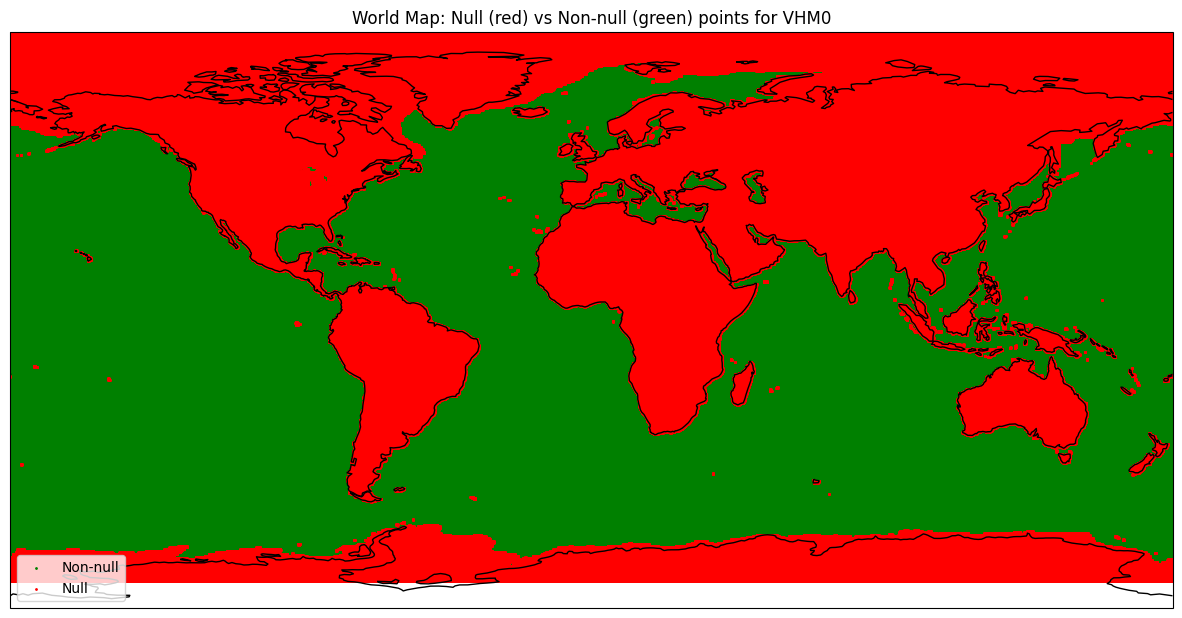

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

non_null_df = df[df['VHM0'].notnull()]
null_df = df[df['VHM0'].isnull()]


plt.figure(figsize=(15, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()


plt.scatter(non_null_df['longitude'], non_null_df['latitude'],
            color='green', s=1, transform=ccrs.PlateCarree(), label='Non-null')
plt.scatter(null_df['longitude'], null_df['latitude'],
            color='red', s=1, transform=ccrs.PlateCarree(), label='Null')

plt.title("World Map: Null (red) vs Non-null (green) points for VHM0")
plt.legend()
plt.show()


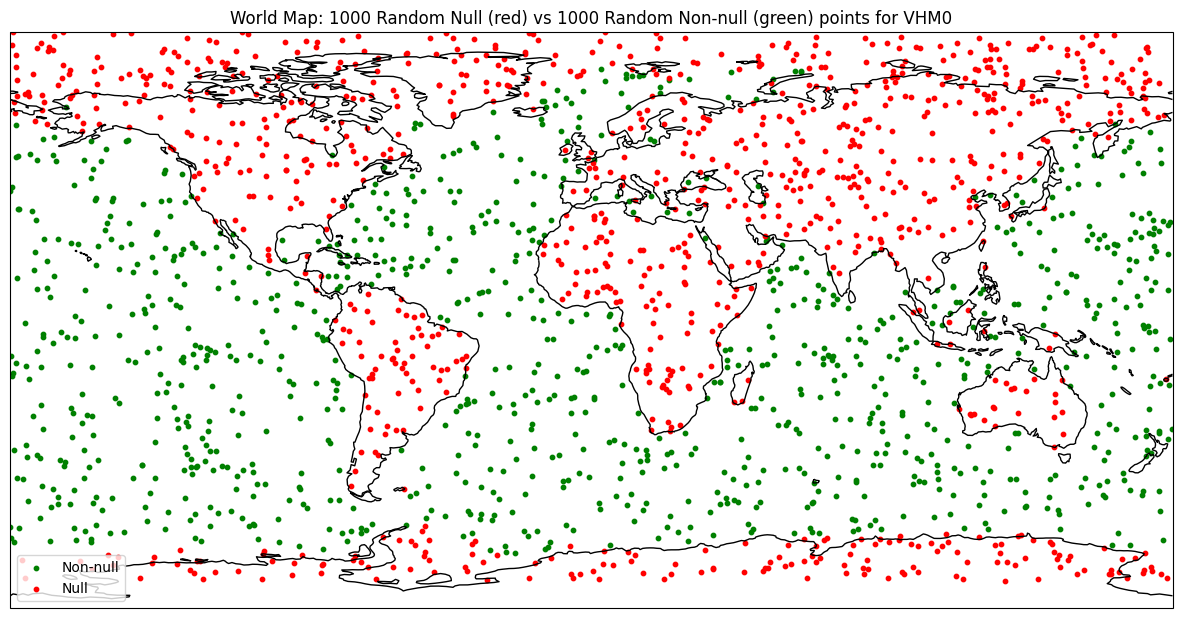

In [ ]:
# Randomly sample 1000 non-null and 1000 null points based on VHM0
# If there are fewer than 1000 points in any category, it will use all available points
sampled_non_null = non_null_df.sample(n=1000, random_state=42) if len(non_null_df) >= 1000 else non_null_df
sampled_null = null_df.sample(n=1000, random_state=42) if len(null_df) >= 1000 else null_df

# Plotting on a world map using Cartopy
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

plt.figure(figsize=(15, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

# Plot sampled non-null points (green) and null points (red)
plt.scatter(sampled_non_null['longitude'], sampled_non_null['latitude'],
            color='green', s=10, transform=ccrs.PlateCarree(), label='Non-null')
plt.scatter(sampled_null['longitude'], sampled_null['latitude'],
            color='red', s=10, transform=ccrs.PlateCarree(), label='Null')

plt.title("World Map: 1000 Random Null (red) vs 1000 Random Non-null (green) points for VHM0")
plt.legend()
plt.show()


Original shape: (8817120, 24)
After dropping null rows: (5129046, 24)


/usr/local/lib/python3.11/dist-packages/cartopy/mpl/geoaxes.py:524: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  return super().draw(renderer=renderer, **kwargs)
/usr/local/lib/python3.11/dist-packages/cartopy/mpl/geoaxes.py:524: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  return super().draw(renderer=renderer, **kwargs)
/usr/local/lib/python3.11/dist-packages/cartopy/mpl/geoaxes.py:498: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  return super().get_tightbbox(renderer, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/cartopy/mpl/geoaxes.py:524: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  return super().draw(renderer=renderer, **kwargs)
/usr/local/lib/python3.11/dist-packages/cartopy/mpl/geoaxes.py:524: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  return super().draw(re

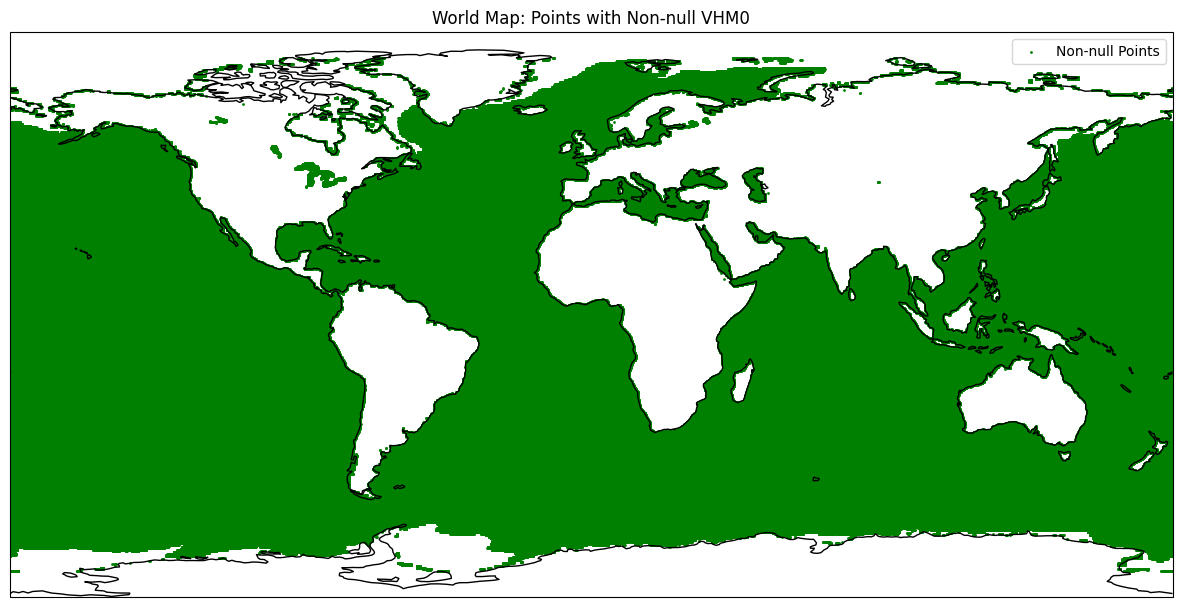

In [ ]:
# Reset the index to make coordinates regular columns
df =  pd.read_csv('/content/output.csv')
df_reset = df.reset_index()

# Drop rows where VHM0 (or any specified column) is null
df_nonnull = df_reset.dropna(subset=['VHM0'])

# Confirm the shape before and after dropping nulls
print("Original shape:", df_reset.shape)
print("After dropping null rows:", df_nonnull.shape)

# Plot the non-null points on a world map using Cartopy
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

plt.figure(figsize=(15, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

plt.scatter(df_nonnull['longitude'], df_nonnull['latitude'],
            color='green', s=1, transform=ccrs.PlateCarree(), label='Non-null Points')

plt.title("World Map: Points with Non-null VHM0")
plt.legend()
plt.show()


In [ ]:
non_null_counts = df_nonnull.notnull().sum()
print(non_null_counts)

index        5129046
time         5129046
latitude     5129046
longitude    5129046
VCMX         5129046
VHM0         5129046
VHM0_SW1     5129046
VHM0_SW2     5129046
VHM0_WW      5129046
VMDR         5129046
VMDR_SW1     5129046
VMDR_SW2     5129046
VMDR_WW      5129046
VMXL         3886300
VPED         5129046
VSDX         5129046
VSDY         5129046
VTM01_SW1    5129046
VTM01_SW2    5129046
VTM01_WW     5129046
VTM02        5129046
VTM10        5129046
VTPK         5129046
dtype: int64


In [ ]:
df_nonnull.head()

index       time   latitude   longitude  VCMX  VHM0  VHM0_SW1  \
112320  112320 2025-04-08 -77.833336 -180.000000  3.60  1.82      0.36   
112321  112321 2025-04-08 -77.833336 -179.916672  3.56  1.80      0.36   
112322  112322 2025-04-08 -77.833336 -179.833328  3.53  1.79      0.36   
112323  112323 2025-04-08 -77.833336 -179.750000  3.50  1.77      0.35   
112324  112324 2025-04-08 -77.833336 -179.666672  3.47  1.76      0.35   

        VHM0_SW2  VHM0_WW        VMDR  ...  VMXL   VPED  VSDX  VSDY  \
112320      0.04     1.78  175.529999  ...   NaN  187.5  0.01  0.21   
112321      0.04     1.77  175.529999  ...   NaN  187.5  0.01  0.21   
112322      0.04     1.75  175.529999  ...   NaN  187.5  0.01  0.21   
112323      0.04     1.74  175.529999  ...   NaN  187.5  0.01  0.21   
112324      0.04     1.72  175.539993  ...   NaN  187.5  0.01  0.20   

        VTM01_SW1  VTM01_SW2  VTM01_WW  VTM02  VTM10  VTPK  
112320       4.54       3.98      4.22   3.94   4.64  5.26  
112321       4.51       3.91      4.21   3.93   4.63  5.25  
112322       4.49       3.83      4.20   3.92   4.62  5.24  
112323       4.46       3.77      4.20   3.91   4.61  5.23  
112324       4.44       3.69      4.19   3.91   4.60  5.22  

[5 rows x 23 columns]

              index  time  latitude  longitude      VCMX      VHM0  VHM0_SW1  \
index      1.000000   NaN  1.000000  -0.025046 -0.480464 -0.482301 -0.398346   
time            NaN   NaN       NaN        NaN       NaN       NaN       NaN   
latitude   1.000000   NaN  1.000000  -0.025710 -0.480428 -0.482267 -0.398329   
longitude -0.025046   NaN -0.025710   1.000000 -0.041792 -0.038317 -0.015359   
VCMX      -0.480464   NaN -0.480428  -0.041792  1.000000  0.999575  0.827549   
VHM0      -0.482301   NaN -0.482267  -0.038317  0.999575  1.000000  0.835988   
VHM0_SW1  -0.398346   NaN -0.398329  -0.015359  0.827549  0.835988  1.000000   
VHM0_SW2  -0.324092   NaN -0.324042  -0.067241  0.395686  0.392851  0.216060   
VHM0_WW   -0.339384   NaN -0.339380   0.002843  0.792878  0.781862  0.372178   
VMDR      -0.255965   NaN -0.255915  -0.068534  0.369466  0.371625  0.361593   
VMDR_SW1  -0.183786   NaN -0.183678  -0.157645  0.348052  0.348545  0.301042   
VMDR_SW2  -0.148589   NaN -0.148431  -0.

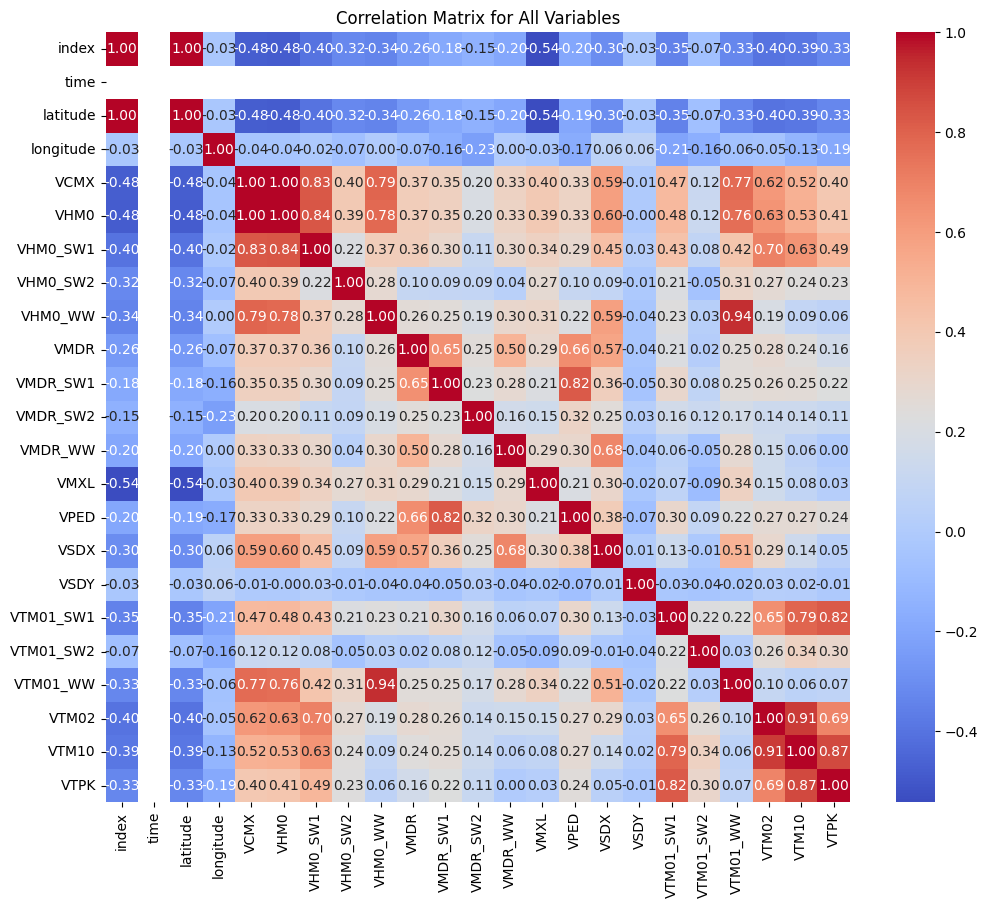

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_nonnull is already defined and contains all non-null rows
# Compute the correlation matrix for all columns
corr_matrix = df_nonnull.corr()

# Print the correlation matrix to the console
print(corr_matrix)

# Optionally, visualize the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix for All Variables")
plt.show()


         index       time   latitude   longitude  VCMX  VHM0  VHM0_SW1  \
112320  112320 2025-04-08 -77.833336 -180.000000  3.60  1.82      0.36   
112321  112321 2025-04-08 -77.833336 -179.916672  3.56  1.80      0.36   
112322  112322 2025-04-08 -77.833336 -179.833328  3.53  1.79      0.36   
112323  112323 2025-04-08 -77.833336 -179.750000  3.50  1.77      0.35   
112324  112324 2025-04-08 -77.833336 -179.666672  3.47  1.76      0.35   

        VHM0_SW2  VHM0_WW        VMDR  ...  VMXL   VPED  VSDX  VSDY  \
112320      0.04     1.78  175.529999  ...   NaN  187.5  0.01  0.21   
112321      0.04     1.77  175.529999  ...   NaN  187.5  0.01  0.21   
112322      0.04     1.75  175.529999  ...   NaN  187.5  0.01  0.21   
112323      0.04     1.74  175.529999  ...   NaN  187.5  0.01  0.21   
112324      0.04     1.72  175.539993  ...   NaN  187.5  0.01  0.20   

        VTM01_SW1  VTM01_SW2  VTM01_WW  VTM02  VTM10  VTPK  
112320       4.54       3.98      4.22   3.94   4.64  5.26  
112321

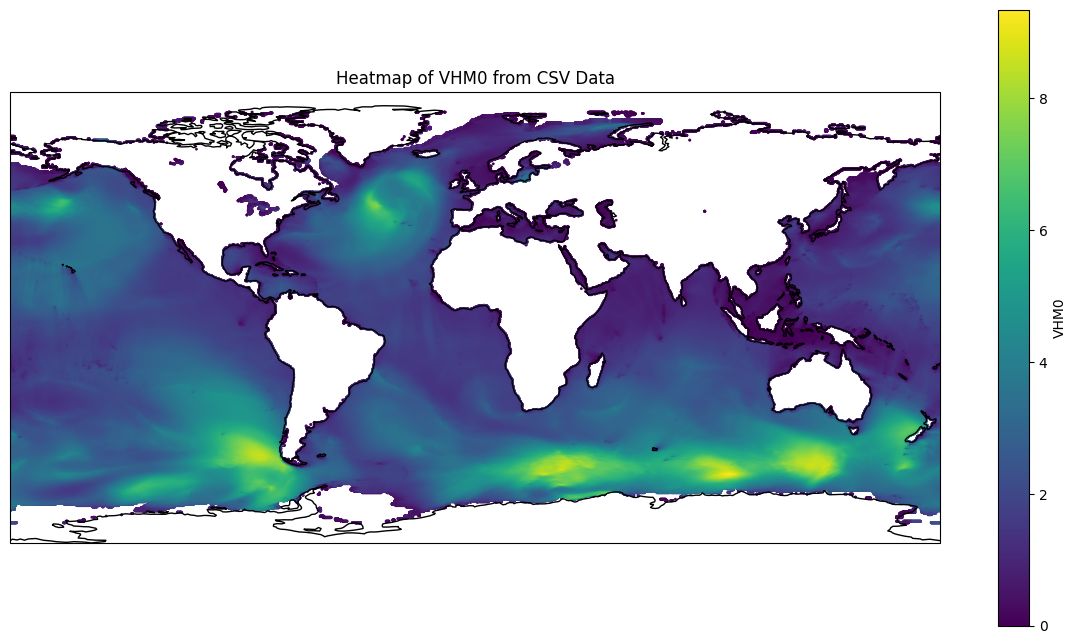

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Load CSV data (adjust the file path if needed)


# Inspect the first few rows to ensure columns like 'latitude', 'longitude', and 'VHM0' exist
print(df_nonnull.head())

# Plot the heatmap using scatter with a color mapping based on VHM0 values
plt.figure(figsize=(15, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

# Create a scatter plot using VHM0 for the color scale
scatter = plt.scatter(df_nonnull['longitude'], df_nonnull['latitude'],
                      c=df_nonnull['VHM0'], cmap='viridis', s=1, transform=ccrs.PlateCarree())

plt.title("Heatmap of VHM0 from CSV Data")
cbar = plt.colorbar(scatter, orientation='vertical', pad=0.05)
cbar.set_label('VHM0')
plt.show()


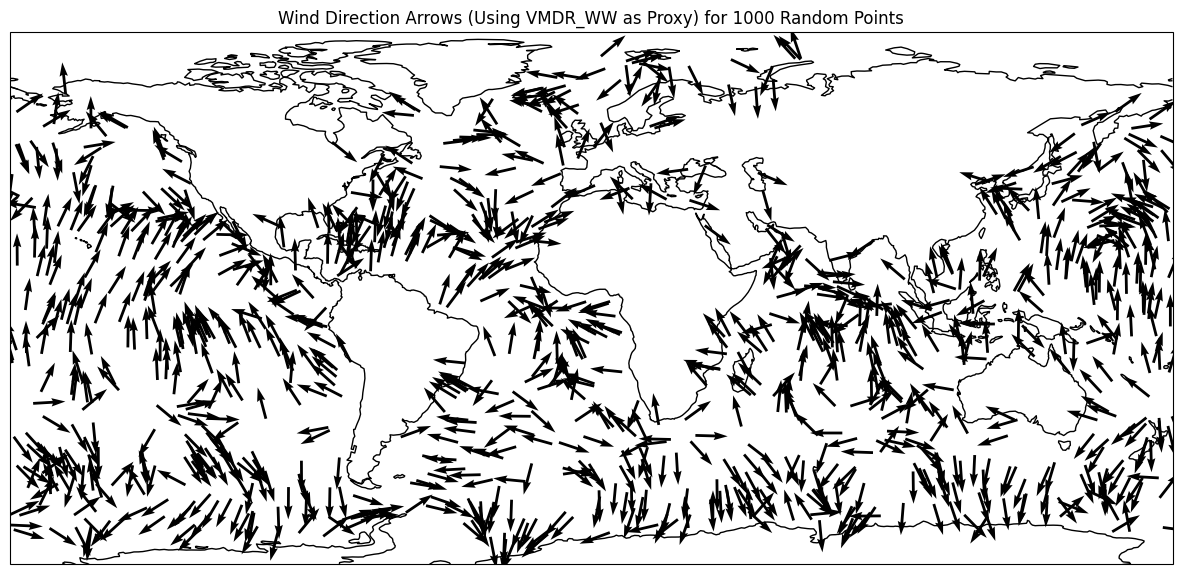

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Load CSV data
# Adjust file path if needed
df_csv = df_nonnull

# Drop rows where wind direction proxy (VMDR_WW) is null
df_wind = df_csv.dropna(subset=['VMDR_WW'])

# Randomly sample 1000 rows from the wind data
sampled_wind = df_wind.sample(n=1000, random_state=42)

# Assume VMDR_WW is in degrees (convert to radians)
theta = np.deg2rad(sampled_wind['VMDR_WW'])

# Compute the components for a unit vector (for arrow direction)
u = np.cos(theta)  # east-west component
v = np.sin(theta)  # north-south component

# Set up the figure with a Plate Carree projection
plt.figure(figsize=(15, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

# Create a quiver plot to show wind direction arrows at the sampled lat/long points
plt.quiver(sampled_wind['longitude'], sampled_wind['latitude'],
           u, v,
           angles='xy', scale_units='xy', scale=0.1,
           transform=ccrs.PlateCarree())

plt.title("Wind Direction Arrows (Using VMDR_WW as Proxy) for 1000 Random Points")
plt.show()


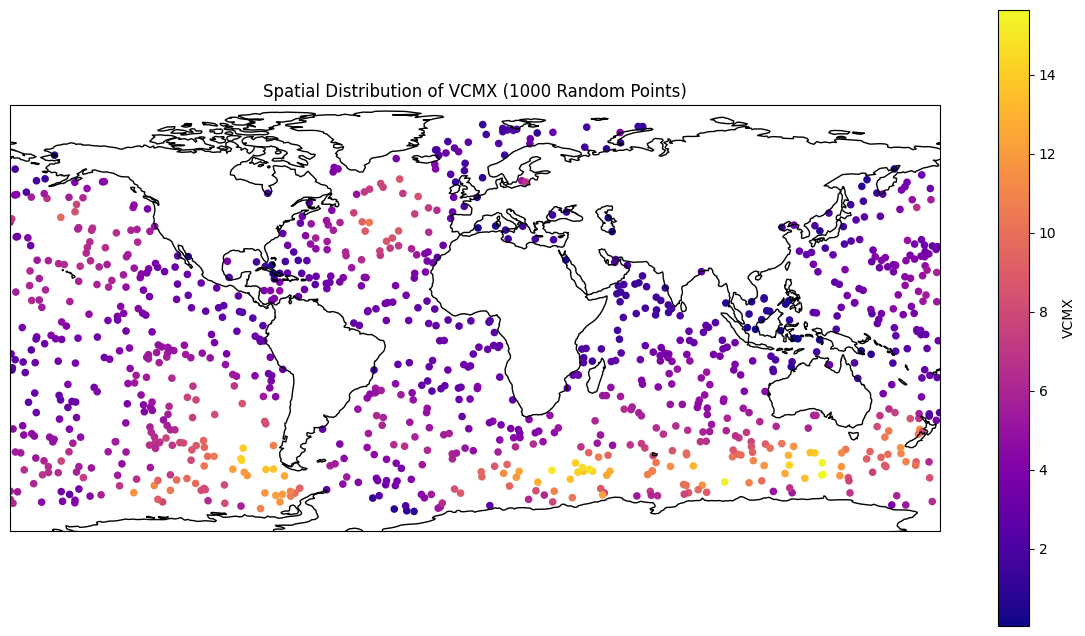

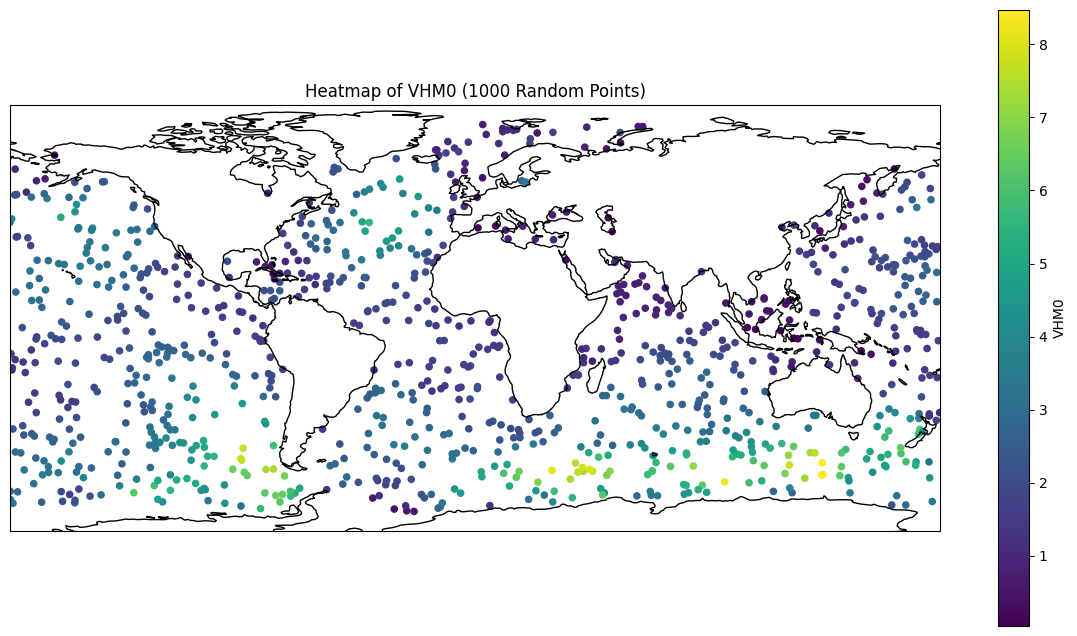

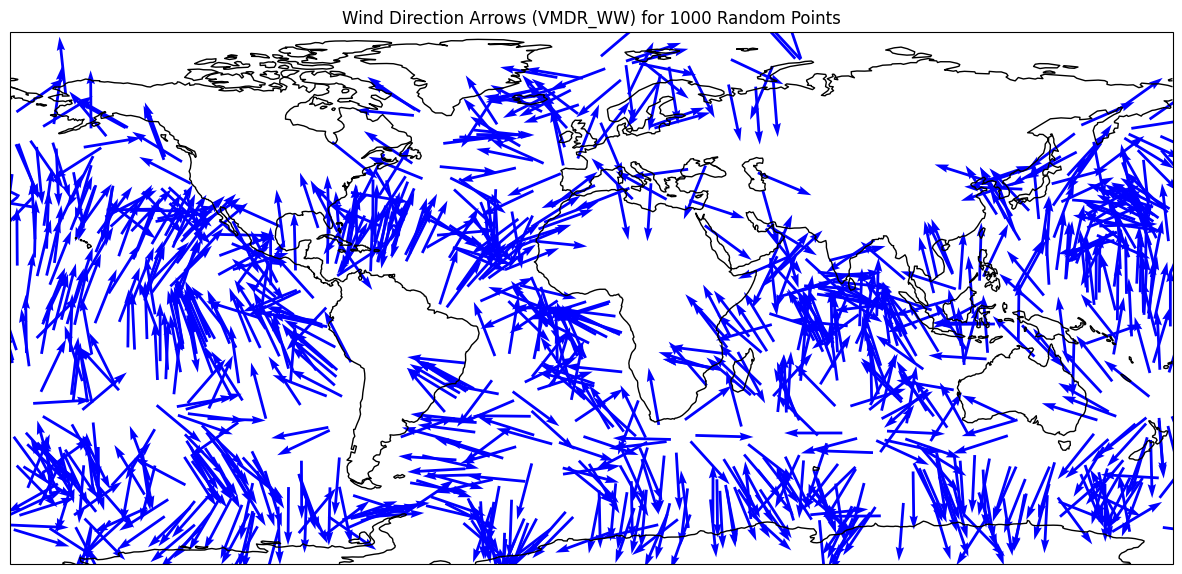

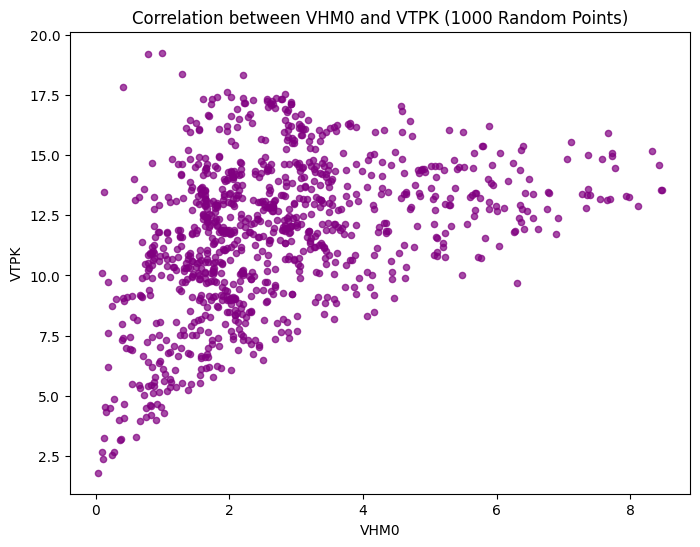

In [ ]:


# Randomly sample 1000 rows from the DataFrame (without dropping any rows)
sampled_df = df_csv.sample(n=1000, random_state=42)

# -------------------------------
# Plot 1: Spatial Distribution of VCMX
# -------------------------------
plt.figure(figsize=(15, 8))
ax1 = plt.axes(projection=ccrs.PlateCarree())
ax1.coastlines()
sc1 = ax1.scatter(sampled_df['longitude'], sampled_df['latitude'],
                  c=sampled_df['VCMX'], cmap='plasma', s=20, transform=ccrs.PlateCarree())
plt.title("Spatial Distribution of VCMX (1000 Random Points)")
cbar1 = plt.colorbar(sc1, orientation='vertical', pad=0.05)
cbar1.set_label('VCMX')
plt.show()

# -------------------------------
# Plot 2: Heatmap of VHM0
# -------------------------------
plt.figure(figsize=(15, 8))
ax2 = plt.axes(projection=ccrs.PlateCarree())
ax2.coastlines()
sc2 = ax2.scatter(sampled_df['longitude'], sampled_df['latitude'],
                  c=sampled_df['VHM0'], cmap='viridis', s=20, transform=ccrs.PlateCarree())
plt.title("Heatmap of VHM0 (1000 Random Points)")
cbar2 = plt.colorbar(sc2, orientation='vertical', pad=0.05)
cbar2.set_label('VHM0')
plt.show()

# -------------------------------
# Plot 3: Wind Direction Arrows (using VMDR_WW)
# -------------------------------
# For wind arrows, we use only rows where VMDR_WW is not null.
wind_sample = sampled_df[sampled_df['VMDR_WW'].notnull()]

# Convert wind direction (assumed in degrees) to radians
theta = np.deg2rad(wind_sample['VMDR_WW'])
# Compute unit vector components (adjust arrow length if you have wind speed data)
u = np.cos(theta)
v = np.sin(theta)

plt.figure(figsize=(15, 8))
ax3 = plt.axes(projection=ccrs.PlateCarree())
ax3.coastlines()
ax3.quiver(wind_sample['longitude'], wind_sample['latitude'], u, v,
           transform=ccrs.PlateCarree(), scale=20, color='blue')
plt.title("Wind Direction Arrows (VMDR_WW) for 1000 Random Points")
plt.show()

# -------------------------------
# Plot 4: Correlation Scatter Plot between VHM0 and VTPK
# -------------------------------
plt.figure(figsize=(8, 6))
plt.scatter(sampled_df['VHM0'], sampled_df['VTPK'], s=20, alpha=0.7, color='purple')
plt.xlabel("VHM0")
plt.ylabel("VTPK")
plt.title("Correlation between VHM0 and VTPK (1000 Random Points)")
plt.show()


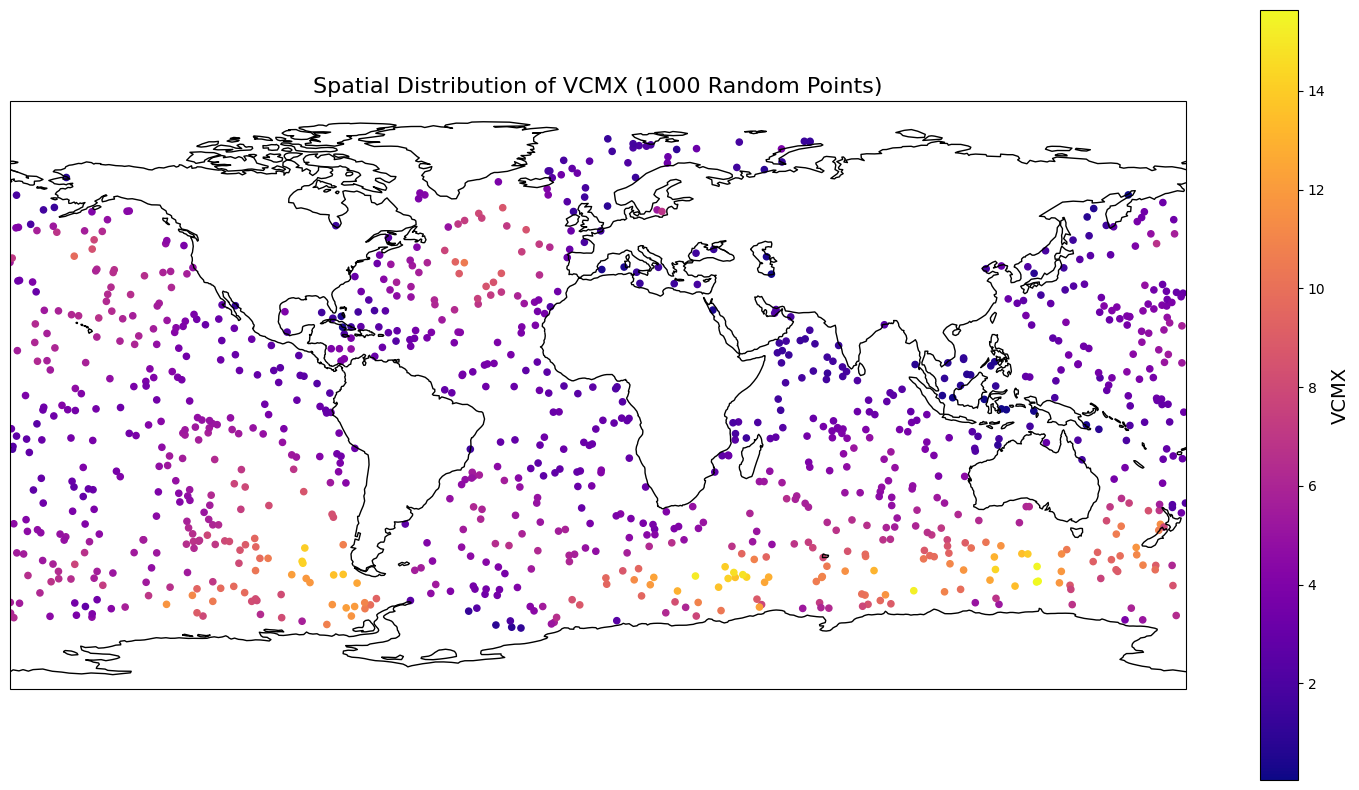

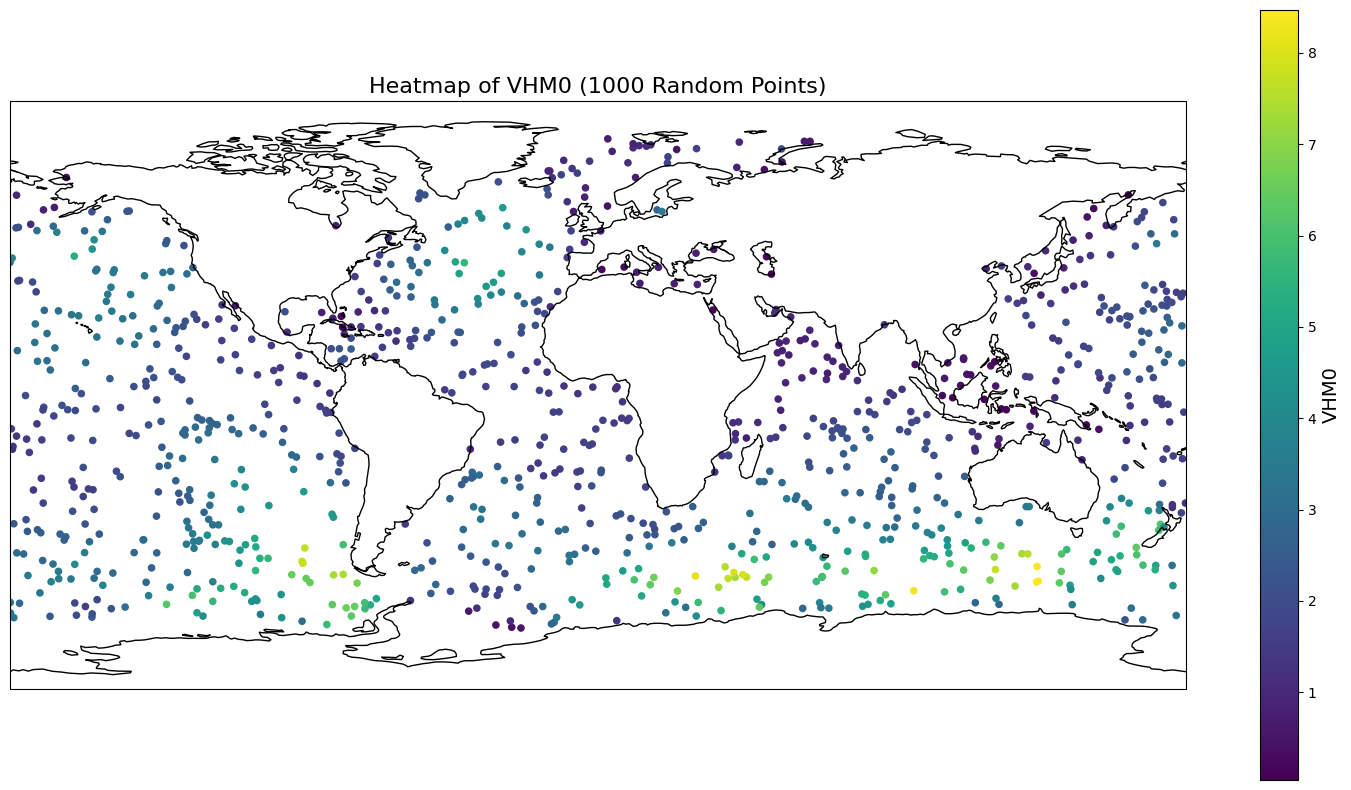

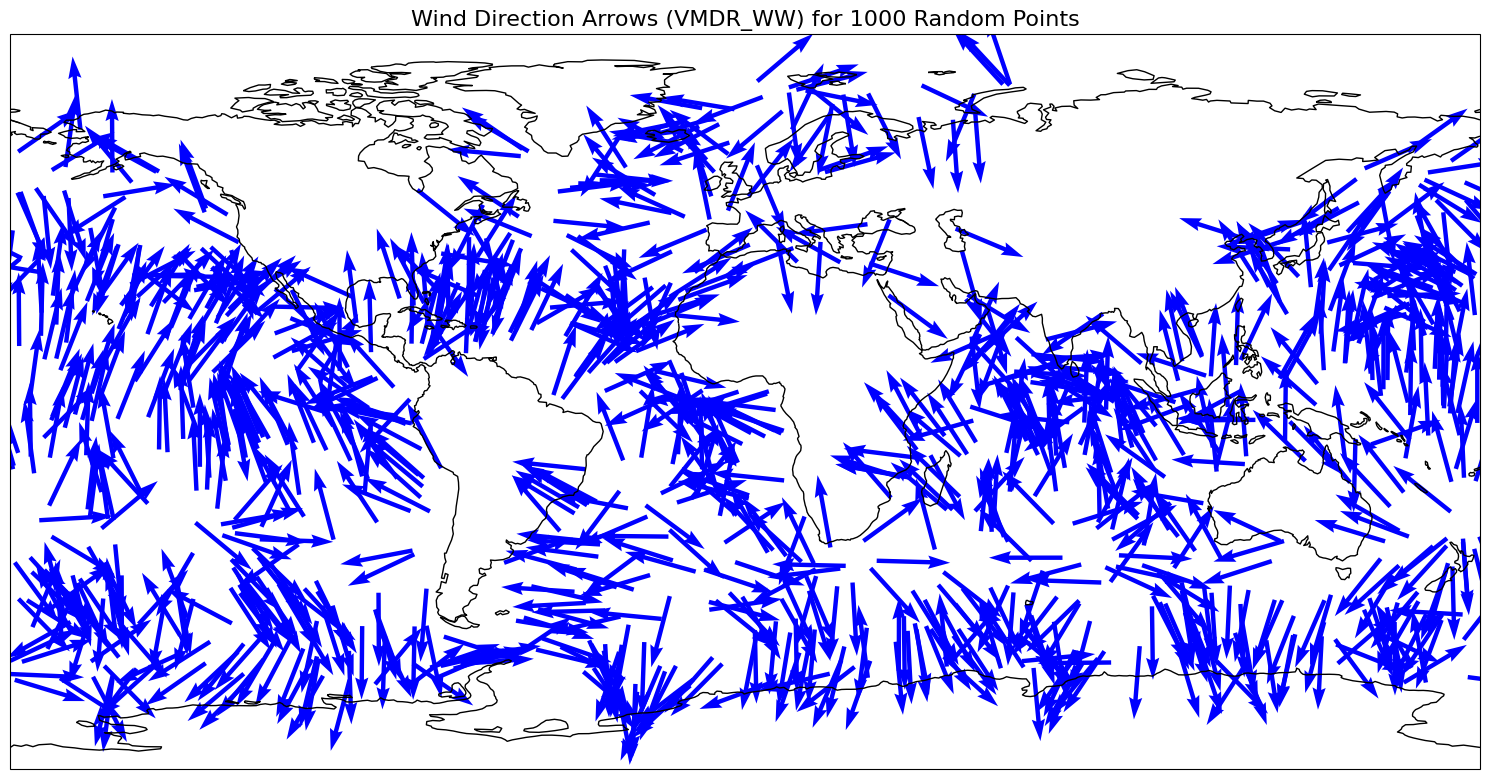

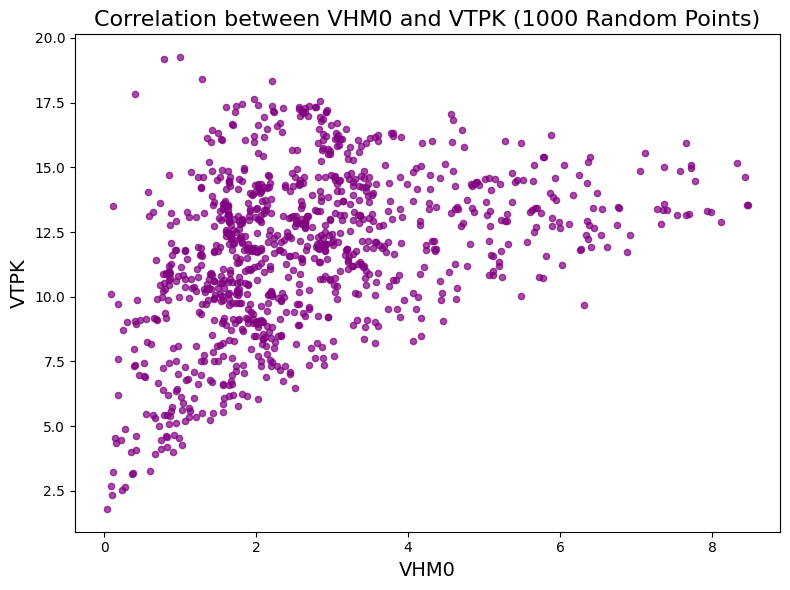

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib.ticker import FixedLocator

# Load CSV data (make sure "output.csv" is in your working directory)
df_csv = df_nonnull

# Randomly sample 1000 rows without dropping any rows
sampled_df = df_csv.sample(n=1000, random_state=42)

# -------------------------------
# Plot 1: Spatial Distribution of VCMX
# -------------------------------
plt.figure(figsize=(15, 8))
ax1 = plt.axes(projection=ccrs.PlateCarree())
ax1.coastlines(linewidth=1)
# Optionally set extent (here using global view; adjust if needed)
ax1.set_global()
sc1 = ax1.scatter(sampled_df['longitude'], sampled_df['latitude'],
                  c=sampled_df['VCMX'], cmap='plasma', s=20,
                  transform=ccrs.PlateCarree())
plt.title("Spatial Distribution of VCMX (1000 Random Points)", fontsize=16)
cbar1 = plt.colorbar(sc1, orientation='vertical', pad=0.05)
cbar1.set_label('VCMX', fontsize=14)
plt.tight_layout()
plt.show()

# -------------------------------
# Plot 2: Heatmap of VHM0
# -------------------------------
plt.figure(figsize=(15, 8))
ax2 = plt.axes(projection=ccrs.PlateCarree())
ax2.coastlines(linewidth=1)
ax2.set_global()
sc2 = ax2.scatter(sampled_df['longitude'], sampled_df['latitude'],
                  c=sampled_df['VHM0'], cmap='viridis', s=20,
                  transform=ccrs.PlateCarree())
plt.title("Heatmap of VHM0 (1000 Random Points)", fontsize=16)
cbar2 = plt.colorbar(sc2, orientation='vertical', pad=0.05)
cbar2.set_label('VHM0', fontsize=14)
plt.tight_layout()
plt.show()

# -------------------------------
# Plot 3: Wind Direction Arrows (using VMDR_WW)
# -------------------------------
# Filter rows where VMDR_WW is not null
wind_sample = sampled_df[sampled_df['VMDR_WW'].notnull()]
theta = np.deg2rad(wind_sample['VMDR_WW'])
u = np.cos(theta)  # eastward component
v = np.sin(theta)  # northward component

plt.figure(figsize=(15, 8))
ax3 = plt.axes(projection=ccrs.PlateCarree())
ax3.coastlines(linewidth=1)
ax3.set_global()
# Plot arrows with a fixed scale for consistency
ax3.quiver(wind_sample['longitude'], wind_sample['latitude'], u, v,
           transform=ccrs.PlateCarree(), scale=20, color='blue', width=0.003)
plt.title("Wind Direction Arrows (VMDR_WW) for 1000 Random Points", fontsize=16)
plt.tight_layout()
plt.show()

# -------------------------------
# Plot 4: Correlation Scatter Plot between VHM0 and VTPK
# -------------------------------
plt.figure(figsize=(8, 6))
plt.scatter(sampled_df['VHM0'], sampled_df['VTPK'], s=20, alpha=0.7, color='purple')
plt.xlabel("VHM0", fontsize=14)
plt.ylabel("VTPK", fontsize=14)
plt.title("Correlation between VHM0 and VTPK (1000 Random Points)", fontsize=16)
plt.tight_layout()
plt.show()


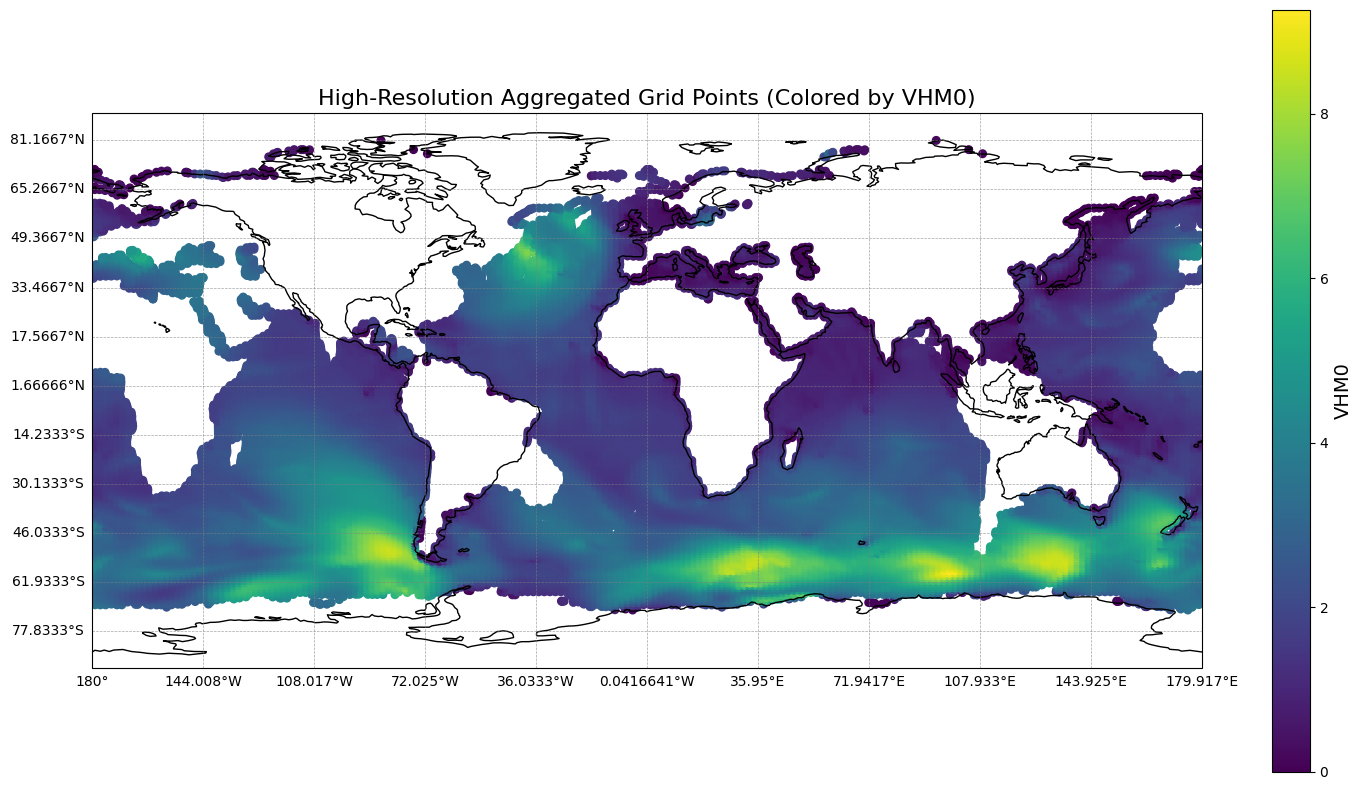

Epoch 1/2


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


524/524 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3805

524/524 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 0.3800 - val_loss: 0.0268 - learning_rate: 0.0010
Epoch 2/2
519/524 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0372

524/524 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0372 - val_loss: 0.0235 - learning_rate: 0.0010


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
Predicted Environmental Conditions for (lat, lon)=(30.0, -150.0):
VCMX: 4.430
VHM0: 1.052
VHM0_SW1: 0.883
VHM0_SW2: 0.371
VHM0_WW: 1.226
VMDR: 216.481
VMDR_SW1: 261.486
VMDR_SW2: 175.533
VMDR_WW: 152.062
VMXL: 0.375
VPED: 253.493
VSDX: -0.033
VSDY: 0.014
VTM01_SW1: 10.986
VTM01_SW2: 12.303
VTM01_WW: 3.155
VTM02: 7.501
VTM10: 10.159
VTPK: 13.440


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib.ticker import FixedLocator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# ============================
# PART 1: Data Aggregation & Grid Creation (High Resolution)
# ============================

# Assume df_nonnull is your pre-loaded non-null DataFrame containing ocean data.
# It must include 'latitude', 'longitude', and environmental parameter columns.
df = df_nonnull.copy().reset_index()  # Ensure latitude and longitude are columns

# Define a finer grid over the domain using 200 bins each (instead of 100)
n_bins = 200
lat_bins = np.linspace(df['latitude'].min(), df['latitude'].max(), n_bins+1)
lon_bins = np.linspace(df['longitude'].min(), df['longitude'].max(), n_bins+1)

# Assign each row to a grid cell
df['lat_bin'] = pd.cut(df['latitude'], bins=lat_bins, labels=False)
df['lon_bin'] = pd.cut(df['longitude'], bins=lon_bins, labels=False)

# Define environmental output columns (all factors to be predicted)
output_cols = [
    'VCMX', 'VHM0', 'VHM0_SW1', 'VHM0_SW2', 'VHM0_WW',
    'VMDR', 'VMDR_SW1', 'VMDR_SW2', 'VMDR_WW',
    'VMXL', 'VPED', 'VSDX', 'VSDY',
    'VTM01_SW1', 'VTM01_SW2', 'VTM01_WW',
    'VTM02', 'VTM10', 'VTPK'
]

# Drop rows with missing environmental values
df_clean = df.dropna(subset=output_cols)

# Group by grid cell and compute the mean for each environmental parameter and coordinate
grouped = df_clean.groupby(['lat_bin', 'lon_bin'])[["latitude", "longitude"] + output_cols].mean().reset_index()

# Plot the aggregated grid centers with effective gridlines
plt.figure(figsize=(15, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=1)
ax.set_global()

# Use fixed tick locators based on the high-resolution bin edges
grid = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                    linewidth=0.5, color='gray', alpha=0.7, linestyle='--')
grid.xlocator = FixedLocator(lon_bins[::int(len(lon_bins)/10)])  # show about 10 tick marks
grid.ylocator = FixedLocator(lat_bins[::int(len(lat_bins)/10)])
grid.top_labels = False
grid.right_labels = False

# Plot aggregated grid centers (colored by VHM0)
sc = ax.scatter(grouped['longitude'], grouped['latitude'], c=grouped['VHM0'],
                cmap='viridis', s=30, transform=ccrs.PlateCarree())
plt.title("High-Resolution Aggregated Grid Points (Colored by VHM0)", fontsize=16)
cbar = plt.colorbar(sc, orientation='vertical', pad=0.05)
cbar.set_label('VHM0', fontsize=14)
plt.tight_layout()
plt.show()

# ============================
# PART 2: Advanced Model Training on Aggregated Grid Data
# ============================

# Use the aggregated grid centers as inputs and averaged environmental parameters as outputs.
X = grouped[['latitude', 'longitude']].values
Y = grouped[output_cols].values

# Scale inputs and outputs
scaler_X = MinMaxScaler()
scaler_Y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
Y_scaled = scaler_Y.fit_transform(Y)

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_scaled, test_size=0.2, random_state=42)

# Build an advanced neural network model with dropout and batch normalization
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(Y_train.shape[1], activation='linear')  # Regression outputs
])
model.compile(optimizer='adam', loss='mse')

# Use callbacks: EarlyStopping, ModelCheckpoint, and ReduceLROnPlateau
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ModelCheckpoint('best_ocean_grid_model.h5', monitor='val_loss', save_best_only=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)
]

# Train the model – using 2 epochs (adjust if needed)
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test),
                    epochs=2, batch_size=32, callbacks=callbacks, verbose=1)

# Save the final model (the best model is saved via checkpointing)
model.save('final_ocean_grid_model.h5')
# In Colab, you can download the model with:
# from google.colab import files; files.download('final_ocean_grid_model.h5')

# ============================
# PART 3: Prediction Function
# ============================
def predict_environment(lat, lon):
    """
    Given a latitude and longitude, predict the environmental conditions.
    The input is normalized using the grid's scaler and the model output is inverse-transformed.
    Returns a dictionary mapping each parameter to its predicted value.
    """
    inp = np.array([[lat, lon]])
    inp_scaled = scaler_X.transform(inp)
    pred_scaled = model.predict(inp_scaled)
    pred = scaler_Y.inverse_transform(pred_scaled)
    return {col: pred[0][i] for i, col in enumerate(output_cols)}

# ============================
# Example Usage
# ============================
lat_input = 30.0   # example latitude
lon_input = -150.0 # example longitude
predicted_conditions = predict_environment(lat_input, lon_input)

print("Predicted Environmental Conditions for (lat, lon)=({}, {}):".format(lat_input, lon_input))
for key, value in predicted_conditions.items():
    print(f"{key}: {value:.3f}")


In [ ]:
lat_input = -32.0397   # example latitude
lon_input = 115.7395 # example longitude
predicted_conditions = predict_environment(lat_input, lon_input)

print("Predicted Environmental Conditions for (lat, lon)=({}, {}):".format(lat_input, lon_input))
for key, value in predicted_conditions.items():
    print(f"{key}: {value:.3f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Predicted Environmental Conditions for (lat, lon)=(-32.0397, 115.7395):
VCMX: 5.283
VHM0: 3.155
VHM0_SW1: 2.651
VHM0_SW2: 0.629
VHM0_WW: 0.856
VMDR: 176.355
VMDR_SW1: 173.366
VMDR_SW2: 140.347
VMDR_WW: 154.413
VMXL: 2.963
VPED: 189.698
VSDX: 0.024
VSDY: 0.058
VTM01_SW1: 10.987
VTM01_SW2: 9.247
VTM01_WW: 2.816
VTM02: 8.539
VTM10: 11.426
VTPK: 14.769


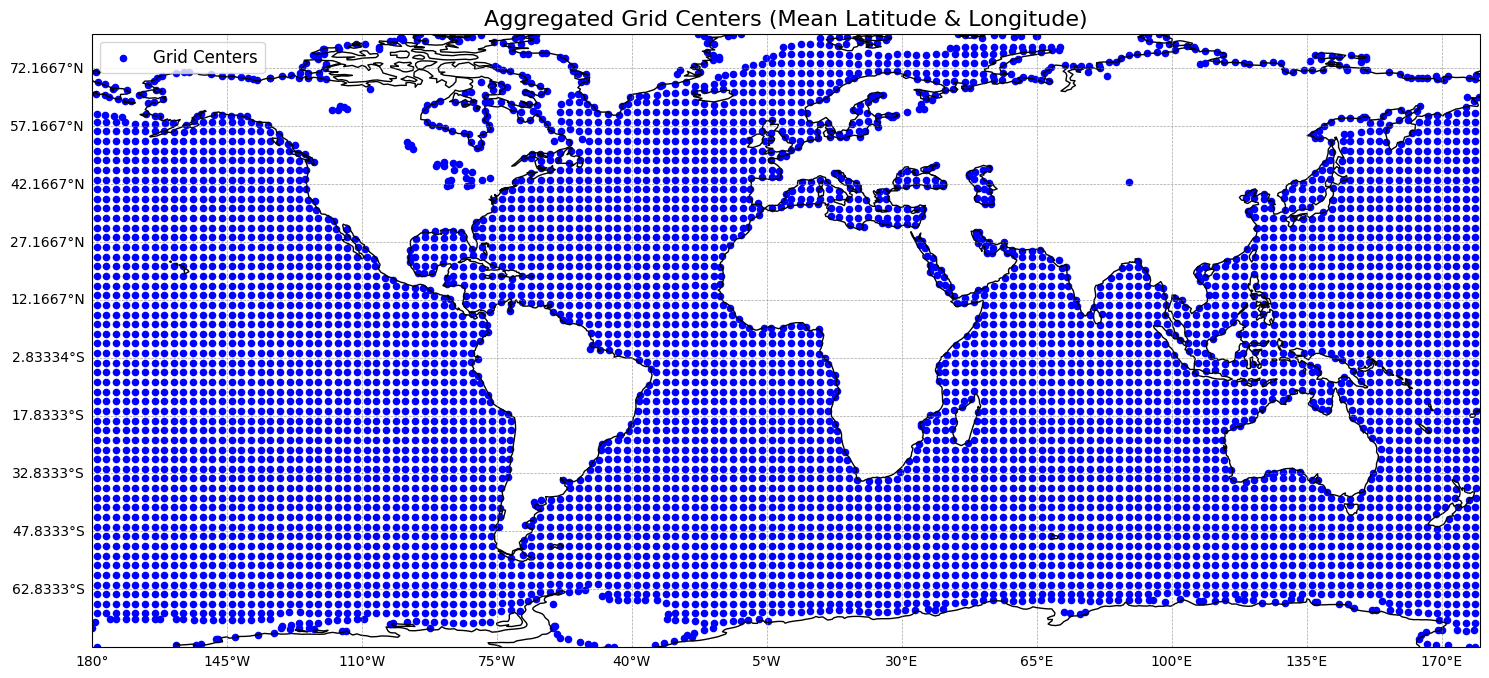

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib.ticker import FixedLocator

# Assume df_nonnull is already loaded and contains 'latitude' and 'longitude'
# For demonstration, we use a copy and reset the index:
df = df_nonnull.copy().reset_index()

# Define grid resolution in degrees (you can adjust this value for a smaller or larger grid)
grid_size = 2.5  # 0.5 degree grid cells

# Determine min and max for latitude and longitude
lat_min, lat_max = df['latitude'].min(), df['latitude'].max()
lon_min, lon_max = df['longitude'].min(), df['longitude'].max()

# Create bin edges for latitude and longitude
lat_bins = np.arange(lat_min, lat_max + grid_size, grid_size)
lon_bins = np.arange(lon_min, lon_max + grid_size, grid_size)

# Assign each row to a grid cell based on bins
df['lat_bin'] = pd.cut(df['latitude'], bins=lat_bins, labels=False)
df['lon_bin'] = pd.cut(df['longitude'], bins=lon_bins, labels=False)

# Group the data by grid cell and compute the mean latitude and longitude for each cell
grouped = df.groupby(['lat_bin', 'lon_bin'])[['latitude', 'longitude']].mean().reset_index()

# ---------------------------
# Plotting the Aggregated Grid Centers
# ---------------------------
plt.figure(figsize=(15, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=1)

# Set extent based on data bounds (optional, adjust as needed)
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

# Optionally, draw the gridlines
gridlines = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                           linewidth=0.5, color='gray', alpha=0.7, linestyle='--')
gridlines.xlocator = FixedLocator(lon_bins[::max(1, int(len(lon_bins)/10))])
gridlines.ylocator = FixedLocator(lat_bins[::max(1, int(len(lat_bins)/10))])
gridlines.top_labels = False
gridlines.right_labels = False

# Plot the computed grid centers (mean lat and lon) as scatter points
sc = ax.scatter(grouped['longitude'], grouped['latitude'], color='blue', s=20,
                transform=ccrs.PlateCarree(), label="Grid Centers")

plt.title("Aggregated Grid Centers (Mean Latitude & Longitude)", fontsize=16)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pickle

# ============================
# PART 1: Data Aggregation & Grid Creation
# ============================
# Assume df_nonnull is your pre-loaded non-null DataFrame containing ocean data.
# It must include 'latitude', 'longitude', and environmental parameter columns.
df = df_nonnull.copy().reset_index()  # Ensure latitude and longitude are columns

# Define grid resolution in degrees (adjust grid_size for a finer/coarser grid)
grid_size = 2.5
lat_min, lat_max = df['latitude'].min(), df['latitude'].max()
lon_min, lon_max = df['longitude'].min(), df['longitude'].max()

# Create bin edges
lat_bins = np.arange(lat_min, lat_max + grid_size, grid_size)
lon_bins = np.arange(lon_min, lon_max + grid_size, grid_size)

# Assign each row to a grid cell based on bins
df['lat_bin'] = pd.cut(df['latitude'], bins=lat_bins, labels=False)
df['lon_bin'] = pd.cut(df['longitude'], bins=lon_bins, labels=False)

# Define environmental output columns (as in your dataset)
output_cols = [
    'VCMX', 'VHM0', 'VHM0_SW1', 'VHM0_SW2', 'VHM0_WW',
    'VMDR', 'VMDR_SW1', 'VMDR_SW2', 'VMDR_WW',
    'VMXL', 'VPED', 'VSDX', 'VSDY',
    'VTM01_SW1', 'VTM01_SW2', 'VTM01_WW',
    'VTM02', 'VTM10', 'VTPK'
]

# Drop rows with missing environmental values
df_clean = df.dropna(subset=output_cols)

# Group by grid cell and compute the mean of environmental parameters
grouped = df_clean.groupby(['lat_bin', 'lon_bin'])[output_cols].mean().reset_index()

# Compute grid cell centers from bin edges for accurate coordinates
grouped['center_lat'] = grouped['lat_bin'].apply(lambda x: (lat_bins[int(x)] + lat_bins[int(x)+1]) / 2)
grouped['center_lon'] = grouped['lon_bin'].apply(lambda x: (lon_bins[int(x)] + lon_bins[int(x)+1]) / 2)

# ============================
# PART 2: Model Training
# ============================
# Use grid centers as inputs and averaged environmental parameters as outputs.
X = grouped[['center_lat', 'center_lon']].values
Y = grouped[output_cols].values

# Scale inputs and outputs to [0,1]
scaler_X = MinMaxScaler()
scaler_Y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
Y_scaled = scaler_Y.fit_transform(Y)

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_scaled, test_size=0.2, random_state=42)

# Build a simple neural network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(Y_train.shape[1], activation='linear')  # Linear outputs for regression
])
model.compile(optimizer='adam', loss='mse')

# Train the model (using 2 epochs for demonstration)
model.fit(X_train, Y_train, validation_data=(X_test, Y_test),
          epochs=2, batch_size=32, verbose=1)

# Save the model and the scalers for future use
model.save('simple_ocean_model.h5')
with open('scaler_X.pkl', 'wb') as f:
    pickle.dump(scaler_X, f)
with open('scaler_Y.pkl', 'wb') as f:
    pickle.dump(scaler_Y, f)

# ============================
# PART 3: Prediction Function with Friendly Names
# ============================
# Define a mapping to convert column codes to human-friendly names.
friendly_names = {
    'VCMX': 'Maximum Wave Crest',
    'VHM0': 'Significant Wave Height',
    'VHM0_SW1': 'Swell 1 Wave Height',
    'VHM0_SW2': 'Swell 2 Wave Height',
    'VHM0_WW': 'Wind Wave Height',
    'VMDR': 'Mean Wave Direction',
    'VMDR_SW1': 'Swell 1 Wave Direction',
    'VMDR_SW2': 'Swell 2 Wave Direction',
    'VMDR_WW': 'Wind Wave Direction',
    'VMXL': 'Maximum Wavelength',
    'VPED': 'Baseline Wave Energy',
    'VSDX': 'Directional Spread X',
    'VSDY': 'Directional Spread Y',
    'VTM01_SW1': 'Characteristic Period - Swell 1',
    'VTM01_SW2': 'Characteristic Period - Swell 2',
    'VTM01_WW': 'Characteristic Period - Wind Waves',
    'VTM02': 'Second Spectral Moment Period',
    'VTM10': 'Tenth Spectral Moment Period',
    'VTPK': 'Peak Wave Period'
}

def predict_environment(lat, lon):
    """
    Given a latitude and longitude, predict the oceanic environmental conditions.
    The input is normalized using scaler_X, then the model predicts and the outputs are inverse-transformed.
    Returns a dictionary with human-friendly parameter names.
    """
    inp = np.array([[lat, lon]])
    inp_scaled = scaler_X.transform(inp)
    pred_scaled = model.predict(inp_scaled)
    pred = scaler_Y.inverse_transform(pred_scaled)
    predictions = {col: pred[0][i] for i, col in enumerate(output_cols)}
    friendly_predictions = {friendly_names[col]: predictions[col] for col in predictions}
    return friendly_predictions

# ============================
# Example Usage
# ============================
lat_input = 30.0   # Example ocean latitude
lon_input = -150.0 # Example ocean longitude
predicted_conditions = predict_environment(lat_input, lon_input)

print("Predicted Environmental Conditions for (lat, lon)=({}, {}):".format(lat_input, lon_input))
for key, value in predicted_conditions.items():
    print(f"{key}: {value:.3f}")


Epoch 1/2


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


131/131 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1001 - val_loss: 0.0301
Epoch 2/2
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0289 - val_loss: 0.0284


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Predicted Environmental Conditions for (lat, lon)=(30.0, -150.0):
Maximum Wave Crest: 4.293
Significant Wave Height: 2.166
Swell 1 Wave Height: 1.419
Swell 2 Wave Height: 0.635
Wind Wave Height: 0.745
Mean Wave Direction: 192.358
Swell 1 Wave Direction: 197.531
Swell 2 Wave Direction: 207.615
Wind Wave Direction: 159.849
Maximum Wavelength: 1.321
Baseline Wave Energy: 197.676
Directional Spread X: -0.009
Directional Spread Y: 0.004
Characteristic Period - Swell 1: 8.885
Characteristic Period - Swell 2: 9.323
Characteristic Period - Wind Waves: 2.910
Second Spectral Moment Period: 6.505
Tenth Spectral Moment Period: 9.201
Peak Wave Period: 11.753


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model

# Load the model with a custom mapping for "mse"
model = load_model('simple_ocean_model.h5', custom_objects={'mse': tf.keras.losses.MeanSquaredError()})


In [ ]:
# Assuming you have loaded the model and scalers as follows:
import tensorflow as tf
from tensorflow.keras.models import load_model
import pickle

model = load_model('simple_ocean_model.h5', custom_objects={'mse': tf.keras.losses.MeanSquaredError()})

with open('scaler_X.pkl', 'rb') as f:
    scaler_X = pickle.load(f)
with open('scaler_Y.pkl', 'rb') as f:
    scaler_Y = pickle.load(f)

# Define output column names and friendly names as in training
output_cols = [
    'VCMX', 'VHM0', 'VHM0_SW1', 'VHM0_SW2', 'VHM0_WW',
    'VMDR', 'VMDR_SW1', 'VMDR_SW2', 'VMDR_WW',
    'VMXL', 'VPED', 'VSDX', 'VSDY',
    'VTM01_SW1', 'VTM01_SW2', 'VTM01_WW',
    'VTM02', 'VTM10', 'VTPK'
]

friendly_names = {
    'VCMX': 'Maximum Wave Crest',
    'VHM0': 'Significant Wave Height',
    'VHM0_SW1': 'Swell 1 Wave Height',
    'VHM0_SW2': 'Swell 2 Wave Height',
    'VHM0_WW': 'Wind Wave Height',
    'VMDR': 'Mean Wave Direction',
    'VMDR_SW1': 'Swell 1 Wave Direction',
    'VMDR_SW2': 'Swell 2 Wave Direction',
    'VMDR_WW': 'Wind Wave Direction',
    'VMXL': 'Maximum Wavelength',
    'VPED': 'Baseline Wave Energy',
    'VSDX': 'Directional Spread X',
    'VSDY': 'Directional Spread Y',
    'VTM01_SW1': 'Characteristic Period - Swell 1',
    'VTM01_SW2': 'Characteristic Period - Swell 2',
    'VTM01_WW': 'Characteristic Period - Wind Waves',
    'VTM02': 'Second Spectral Moment Period',
    'VTM10': 'Tenth Spectral Moment Period',
    'VTPK': 'Peak Wave Period'
}

def predict_environment(lat, lon):
    """
    Given a latitude and longitude, predict the oceanic environmental conditions.
    """
    inp = np.array([[lat, lon]])
    inp_scaled = scaler_X.transform(inp)
    pred_scaled = model.predict(inp_scaled)
    pred = scaler_Y.inverse_transform(pred_scaled)
    predictions = {col: pred[0][i] for i, col in enumerate(output_cols)}
    # Convert to friendly names
    friendly_predictions = {friendly_names[col]: predictions[col] for col in predictions}
    return friendly_predictions

# Test the model with a sample coordinate
lat_input = 302.0   # Example latitude
lon_input = -150.0 # Example longitude

results = predict_environment(lat_input, lon_input)

print(f"Predicted Environmental Conditions for (lat, lon)=({lat_input}, {lon_input}):")
for key, value in results.items():
    print(f"{key}: {value:.3f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Predicted Environmental Conditions for (lat, lon)=(302.0, -150.0):
Maximum Wave Crest: 8.106
Significant Wave Height: 2.305
Swell 1 Wave Height: 1.362
Swell 2 Wave Height: 0.593
Wind Wave Height: 1.390
Mean Wave Direction: 320.273
Swell 1 Wave Direction: 322.535
Swell 2 Wave Direction: 291.899
Wind Wave Direction: 253.088
Maximum Wavelength: -1.041
Baseline Wave Energy: 298.063
Directional Spread X: 0.279
Directional Spread Y: 0.170
Characteristic Period - Swell 1: 9.858
Characteristic Period - Swell 2: 12.669
Characteristic Period - Wind Waves: 4.847
Second Spectral Moment Period: 6.685
Tenth Spectral Moment Period: 10.231
Peak Wave Period: 13.570


In [ ]:
lat_input = 302.0   # Example latitude
lon_input = -150.0 # Example longitude

results = predict_environment(lat_input, lon_input)

print(f"Predicted Environmental Conditions for (lat, lon)=({lat_input}, {lon_input}):")
for key, value in results.items():
    print(f"{key}: {value:.3f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Predicted Environmental Conditions for (lat, lon)=(302.0, -150.0):
Maximum Wave Crest: 8.106
Significant Wave Height: 2.305
Swell 1 Wave Height: 1.362
Swell 2 Wave Height: 0.593
Wind Wave Height: 1.390
Mean Wave Direction: 320.273
Swell 1 Wave Direction: 322.535
Swell 2 Wave Direction: 291.899
Wind Wave Direction: 253.088
Maximum Wavelength: -1.041
Baseline Wave Energy: 298.063
Directional Spread X: 0.279
Directional Spread Y: 0.170
Characteristic Period - Swell 1: 9.858
Characteristic Period - Swell 2: 12.669
Characteristic Period - Wind Waves: 4.847
Second Spectral Moment Period: 6.685
Tenth Spectral Moment Period: 10.231
Peak Wave Period: 13.570


In [ ]:
!pip install uvicorn fastapi pyngrok



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.9 MB/s eta 0:00:00


In [ ]:
%%writefile main.py
from fastapi import FastAPI
from pydantic import BaseModel
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
import pickle

# Load the trained model and scalers
model = load_model('simple_ocean_model.h5', custom_objects={'mse': tf.keras.losses.MeanSquaredError()})
with open('scaler_X.pkl', 'rb') as f:
    scaler_X = pickle.load(f)
with open('scaler_Y.pkl', 'rb') as f:
    scaler_Y = pickle.load(f)

# Define output columns and friendly names
output_cols = [
    'VCMX', 'VHM0', 'VHM0_SW1', 'VHM0_SW2', 'VHM0_WW',
    'VMDR', 'VMDR_SW1', 'VMDR_SW2', 'VMDR_WW',
    'VMXL', 'VPED', 'VSDX', 'VSDY',
    'VTM01_SW1', 'VTM01_SW2', 'VTM01_WW',
    'VTM02', 'VTM10', 'VTPK'
]
friendly_names = {
    'VCMX': 'Maximum Wave Crest',
    'VHM0': 'Significant Wave Height',
    'VHM0_SW1': 'Swell 1 Wave Height',
    'VHM0_SW2': 'Swell 2 Wave Height',
    'VHM0_WW': 'Wind Wave Height',
    'VMDR': 'Mean Wave Direction',
    'VMDR_SW1': 'Swell 1 Wave Direction',
    'VMDR_SW2': 'Swell 2 Wave Direction',
    'VMDR_WW': 'Wind Wave Direction',
    'VMXL': 'Maximum Wavelength',
    'VPED': 'Baseline Wave Energy',
    'VSDX': 'Directional Spread X',
    'VSDY': 'Directional Spread Y',
    'VTM01_SW1': 'Characteristic Period - Swell 1',
    'VTM01_SW2': 'Characteristic Period - Swell 2',
    'VTM01_WW': 'Characteristic Period - Wind Waves',
    'VTM02': 'Second Spectral Moment Period',
    'VTM10': 'Tenth Spectral Moment Period',
    'VTPK': 'Peak Wave Period'
}

def predict_environment(lat: float, lon: float):
    inp = np.array([[lat, lon]])
    inp_scaled = scaler_X.transform(inp)
    pred_scaled = model.predict(inp_scaled)
    pred = scaler_Y.inverse_transform(pred_scaled)
    predictions = {col: pred[0][i] for i, col in enumerate(output_cols)}
    return {friendly_names[col]: predictions[col] for col in predictions}

# Request model
class PredictionRequest(BaseModel):
    latitude: float
    longitude: float

app = FastAPI()

@app.post("/predict")
def get_prediction(request: PredictionRequest):
    result = predict_environment(request.latitude, request.longitude)
    return {"predictions": result}


Writing main.py


In [ ]:
!uvicorn main:app --host 0.0.0.0 --port 8000 &


2025-03-29 21:31:34.490100: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743283894.535100   91079 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743283894.548778   91079 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-29 21:31:52.889007: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
INFO:     Started server process [91079]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)
INFO:     Shutting down
INFO:     Waiting for application s

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
import torch.optim as optim

# For Colab download (optional)
try:
    from google.colab import files
    colab_download = True
except ImportError:
    colab_download = False

# ----------------------------
# Data Aggregation & Grid Creation
# ----------------------------
df = df_nonnull.copy().reset_index()  # ensure 'latitude' & 'longitude' are columns
grid_size = 2.5
lat_min, lat_max = df['latitude'].min(), df['latitude'].max()
lon_min, lon_max = df['longitude'].min(), df['longitude'].max()
lat_bins = np.arange(lat_min, lat_max + grid_size, grid_size)
lon_bins = np.arange(lon_min, lon_max + grid_size, grid_size)
df['lat_bin'] = pd.cut(df['latitude'], bins=lat_bins, labels=False)
df['lon_bin'] = pd.cut(df['longitude'], bins=lon_bins, labels=False)

# Environmental parameters (adjust columns as needed)
output_cols = ['VCMX', 'VHM0', 'VHM0_SW1', 'VHM0_SW2', 'VHM0_WW',
               'VMDR', 'VMDR_SW1', 'VMDR_SW2', 'VMDR_WW',
               'VMXL', 'VPED', 'VSDX', 'VSDY',
               'VTM01_SW1', 'VTM01_SW2', 'VTM01_WW',
               'VTM02', 'VTM10', 'VTPK']
df_clean = df.dropna(subset=output_cols)
grouped = df_clean.groupby(['lat_bin','lon_bin'])[output_cols].mean().reset_index()
grouped['center_lat'] = grouped['lat_bin'].apply(lambda x: (lat_bins[int(x)] + lat_bins[int(x)+1]) / 2)
grouped['center_lon'] = grouped['lon_bin'].apply(lambda x: (lon_bins[int(x)] + lon_bins[int(x)+1]) / 2)
X = grouped[['center_lat', 'center_lon']].values
Y = grouped[output_cols].values

# Scale features to [0,1]
scaler_X = MinMaxScaler()
scaler_Y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
Y_scaled = scaler_Y.fit_transform(Y)
X_train, _, Y_train, _ = train_test_split(X_scaled, Y_scaled, test_size=0.2, random_state=42)

# ----------------------------
# PyTorch Model Training
# ----------------------------
class OceanModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, len(output_cols))
        self.relu = nn.ReLU()
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        return self.fc3(x)

model = OceanModel()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
epochs, batch_size = 2, 32

train_dataset = torch.utils.data.TensorDataset(torch.tensor(X_train, dtype=torch.float32),
                                                 torch.tensor(Y_train, dtype=torch.float32))
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

for epoch in range(epochs):
    model.train()
    for batch_X, batch_Y in train_loader:
        optimizer.zero_grad()
        loss = criterion(model(batch_X), batch_Y)
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1} complete.")

# ----------------------------
# Create Pipeline with Embedded Scalers
# ----------------------------
class OceanPipeline(nn.Module):
    def __init__(self, base_model, scaler_X, scaler_Y):
        super().__init__()
        self.base_model = base_model
        # Register scaling parameters as buffers
        self.register_buffer('X_min', torch.tensor(scaler_X.data_min_, dtype=torch.float32))
        self.register_buffer('X_max', torch.tensor(scaler_X.data_max_, dtype=torch.float32))
        self.register_buffer('Y_min', torch.tensor(scaler_Y.data_min_, dtype=torch.float32))
        self.register_buffer('Y_max', torch.tensor(scaler_Y.data_max_, dtype=torch.float32))
    def forward(self, x):
        x_scaled = (x - self.X_min) / (self.X_max - self.X_min)
        y_scaled = self.base_model(x_scaled)
        return y_scaled * (self.Y_max - self.Y_min) + self.Y_min
    # Optional prediction function
    def predict(self, lat, lon):
        self.eval()
        with torch.no_grad():
            inp = torch.tensor([[lat, lon]], dtype=torch.float32)
            return self.forward(inp).numpy().flatten()

pipeline = OceanPipeline(model, scaler_X, scaler_Y)

# Save the entire pipeline as a single .pt file
torch.save(pipeline, 'eazir_ocean_model.pt')
print("Model saved as 'eazir_ocean_model.pt'.")

# ----------------------------
# Download the .pt file (only in Colab)
# ----------------------------
if colab_download:
    files.download('eazir_ocean_model.pt')


Epoch 1 complete.
Epoch 2 complete.
Model saved as 'eazir_ocean_model.pt'.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Save using legacy serialization to avoid unpickling issues
torch.save(pipeline, 'eazir_ocean_model.pt', _use_new_zipfile_serialization=False)
print("Model saved successfully with legacy serialization.")


Model saved successfully with legacy serialization.


/usr/local/lib/python3.11/dist-packages/torch/serialization.py:991: UserWarning: Couldn't retrieve source code for container of type OceanPipeline. It won't be checked for correctness upon loading.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/serialization.py:991: UserWarning: Couldn't retrieve source code for container of type OceanModel. It won't be checked for correctness upon loading.
  warnings.warn(


In [ ]:
import torch

# Ensure your OceanPipeline class is defined in this notebook/script
# For example:
class OceanPipeline(torch.nn.Module):
    def __init__(self, base_model, scaler_X, scaler_Y):
        super().__init__()
        self.base_model = base_model
        self.register_buffer('X_min', torch.tensor(scaler_X.data_min_, dtype=torch.float32))
        self.register_buffer('X_max', torch.tensor(scaler_X.data_max_, dtype=torch.float32))
        self.register_buffer('Y_min', torch.tensor(scaler_Y.data_min_, dtype=torch.float32))
        self.register_buffer('Y_max', torch.tensor(scaler_Y.data_max_, dtype=torch.float32))
    def forward(self, x):
        x_scaled = (x - self.X_min) / (self.X_max - self.X_min)
        y_scaled = self.base_model(x_scaled)
        return y_scaled * (self.Y_max - self.Y_min) + self.Y_min
    def predict(self, lat, lon):
        self.eval()
        with torch.no_grad():
            inp = torch.tensor([[lat, lon]], dtype=torch.float32)
            pred = self.forward(inp).numpy().flatten()
        # (Optional: Convert predictions to a friendly dictionary here)
        return pred

# Allowlist OceanPipeline for safe unpickling
torch.serialization.add_safe_globals([OceanPipeline])

# Now load the model (set weights_only to False)
pipeline = torch.load('eazir_ocean_model.pt', map_location=torch.device('cpu'), weights_only=False)

# Use the pipeline's predict method to get results
lat_input = 30.0
lon_input = -150.0
predictions = pipeline.predict(lat_input, lon_input)
print("Predicted Environmental Conditions:")
print(predictions)


Predicted Environmental Conditions:
[ 3.7081881e+00  2.0644867e+00  1.5368000e+00  4.8527643e-01
  5.1947457e-01  1.8495097e+02  2.0361891e+02  2.0217459e+02
  1.5986958e+02  1.6512971e+00  1.9870802e+02 -1.8802822e-02
 -8.7557435e-03  8.9851446e+00  9.9455290e+00  2.3201544e+00
  6.5704947e+00  9.3676844e+00  1.1750128e+01]
